In [14]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import pyro
import torch

from jupyterthemes import jtplot
jtplot.style("oceans16")
%matplotlib inline

Just as a normal distribution is specified by mean fector and covariance matrix, a GP is specified by a mean function and covariance function: 
                        \[p(x) \sim \mathcal{GP}(m(x), k(x,x^{\prime}))\]

In [8]:
def exponential_cov(x, y, params):
    return params[0] * np.exp(-0.5 * params[1] * np.subtract.outer(x, y)**2)

In [10]:
def conditional(x_new, x, y, params):
    B = exponential_cov(x_new, x, params)
    C = exponential_cov(x, x, params)
    A = exponential_cov(x_new, x_new, params)
    mu = np.linalg.inv(C).dot(B.T).T.dot(y) # dafu
    sigma = A - B.dot(np.linalg.inv(C).dot(B.T))
    return mu.squeeze(), sigma.squeeze()

<Container object of 3 artists>

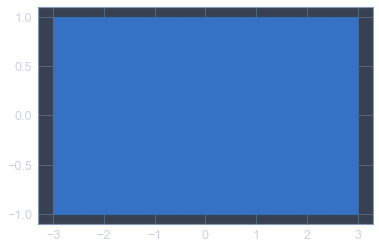

In [15]:
theta = [1, 10]
s_0 = exponential_cov(0, 0, theta)
xpts = np.arange(-3, 3, step=0.01)
plt.errorbar(xpts, np.zeros(len(xpts)), yerr=s_0, capsize=0)

In [47]:
x = [1.]
y = [np.random.normal(scale=s_0)]
y

[1.1823299366896356]

In [48]:
s_1 = exponential_cov(x, x, theta)

In [49]:
def predict(x, data, kernel, params, sigma, t):
    k = [kernel(x, y, params) for y in data]
    Sinv = np.linalg.inv(sigma)
    y_pred = np.dot(k, Sinv).dot(t)
    sigma_new = kernel(x, x, params) - np.dot(k, Sinv).dot(k)
    return y_pred, sigma_new

In [50]:
x_pred = np.linspace(-3, 3, 1000)
predictions = [predict(i, x, exponential_cov, theta, s_1, y) for i in x_pred]

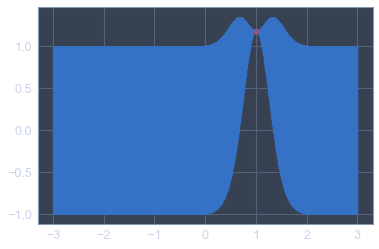

In [51]:
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, 'ro')

In [52]:
m, s = conditional([-0.7], x, y, theta)

In [ ]:
s_